In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.DataFrame(pd.read_csv('./train.csv'))
test_data = pd.DataFrame(pd.read_csv('./test.csv'))
gender_df = pd.DataFrame(pd.read_csv('./gender_submission.csv'))

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)

PassengerId 	-	 0.0
Survived 	-	 0.0
Pclass 	-	 0.0
Name 	-	 0.0
Sex 	-	 0.0
Age 	-	 19.865319865319865
SibSp 	-	 0.0
Parch 	-	 0.0
Ticket 	-	 0.0
Fare 	-	 0.0
Cabin 	-	 77.10437710437711
Embarked 	-	 0.22446689113355783


In [9]:
df = df.drop(["Cabin"], axis=1)

In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
df = df.drop(["PassengerId", "Fare", "Ticket", "Name"], axis = 1)

In [13]:
from sklearn.preprocessing import LabelEncoder


In [14]:
cat_col= df.drop(df.select_dtypes(exclude=['object']), axis=1).columns
print(cat_col)

Index(['Sex', 'Embarked'], dtype='object')


In [15]:
enc1 = LabelEncoder()
df[cat_col[0]] = enc1.fit_transform(df[cat_col[0]].astype('str'))


In [16]:
enc2 = LabelEncoder()
df[cat_col[1]] = enc2.fit_transform(df[cat_col[1]].astype('str'))

In [17]:
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


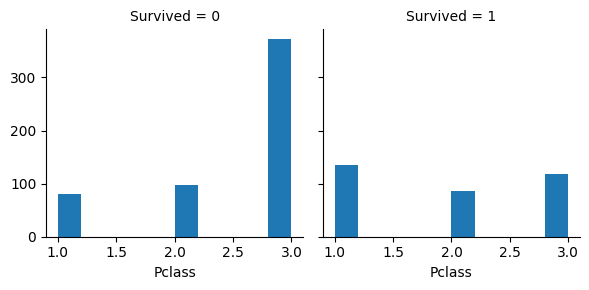

In [19]:
sns.FacetGrid(df, col= 'Survived').map(plt.hist,'Pclass')

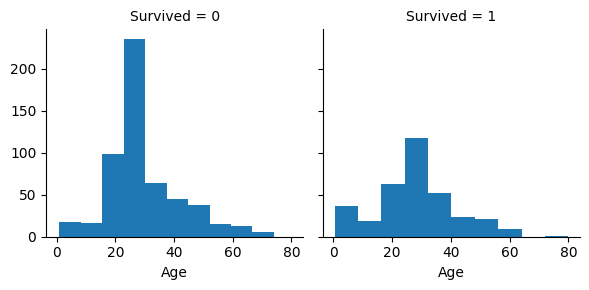

In [20]:
sns.FacetGrid(df, col='Survived').map(plt.hist, 'Age')

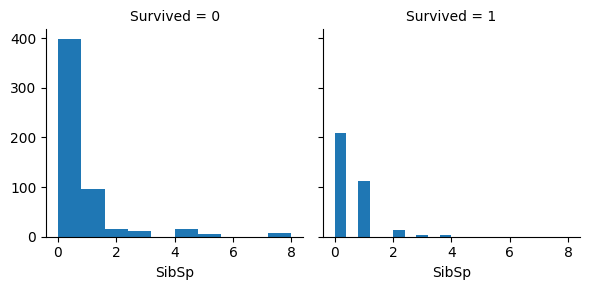

In [21]:
sns.FacetGrid(df, col='Survived').map(plt.hist, 'SibSp')


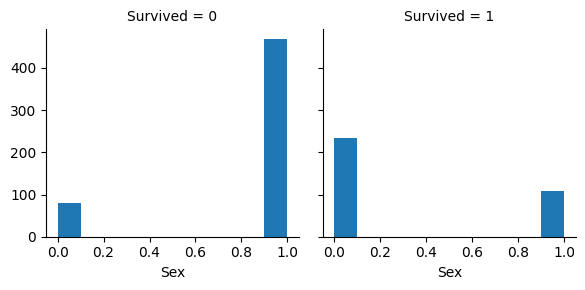

In [22]:
sns.FacetGrid(df, col='Survived').map(plt.hist, 'Sex')


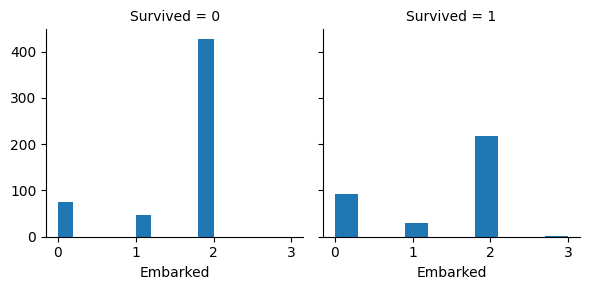

In [23]:
sns.FacetGrid(df, col='Survived').map(plt.hist, 'Embarked')


In [24]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [28]:
y_pred = model.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()


,Actual,Predicted
145,0,0
45,0,0
57,0,0
677,1,1
506,1,1


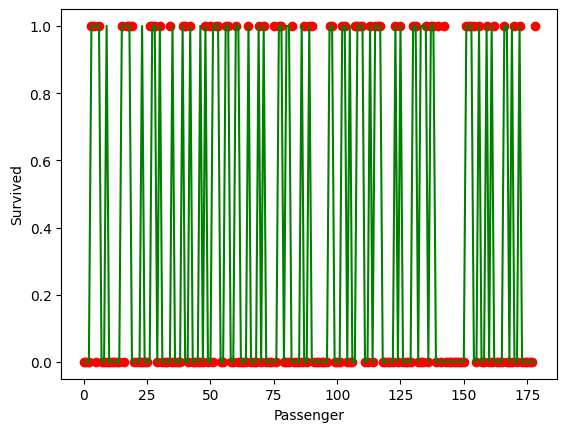

In [30]:
plt.scatter([i for i in range(len(X_test["Age"]))], y_test, color='red')
plt.plot([i for i in range(len(X_test["Age"]))], y_pred, color='green')
plt.ylabel('Survived')
plt.xlabel('Passenger')
plt.show()


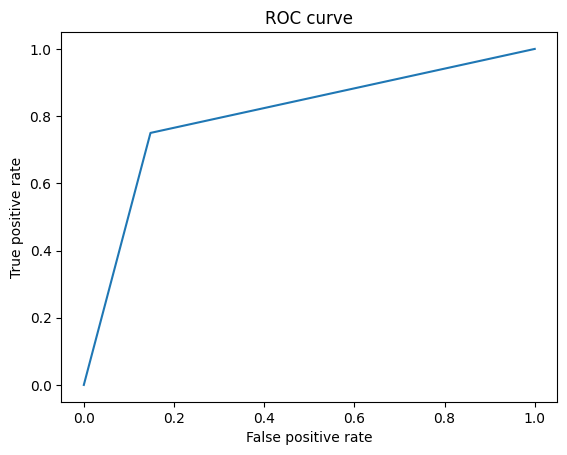

In [31]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [32]:
print("AUC of the predictions: {0}".format(metrics.auc(fpr, tpr)))
print("Accuracy score of the predictions: {0}".format(metrics.accuracy_score(y_pred, y_test)))


AUC of the predictions: 0.8010869565217391
Accuracy score of the predictions: 0.8156424581005587
